# Multiple Linear Regression
## BoomBikes - Bike Sharing - Demand Forecasting

#### Problem Statement:
A US bike-sharing provider `BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

#### Goal:
- Find out Which variables are significant in predicting the demand for shared bikes using EDA
- Find out how well those variables describe the bike demands using multiple linear regression techniques

### 1. Data Understanding

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [5]:
#Reading the bike sharing dataset
day_df = pd.read_csv("C:/Users/Success/Desktop/Jayanth/workspace/BikeSharingAssignment/day.csv")

In [6]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
day_df.shape

(730, 16)

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Observation:

Some of the categorical variables(say "season") are numerical. We must change them as a part of data cleaning

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### 2. Data Cleaning

In [10]:
# Checking for missing values
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Observation:

There are no missing values in the dataset

In [11]:
# Converting the numerical values in the "season" field into string values as per the mapping mentioned in data dictionary

day_df["season"] = day_df["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [12]:
day_df["season"].astype('category').value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [13]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
# Converting the "yr" field to be a categorical variable

day_df['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

In [15]:
# Converting the numerical values in the "mnth" field into string values as per the mapping mentioned in data dictionary

day_df["mnth"] = day_df["mnth"].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

In [16]:
day_df["mnth"].astype('category').value_counts()

Aug     62
Dec     62
Jan     62
Jul     62
Mar     62
May     62
Oct     62
Apr     60
Jun     60
Nov     60
Sept    60
Feb     56
Name: mnth, dtype: int64

In [17]:
# Converting the numerical values in the "weekday" field into string values as per date field and the calendar

day_df["weekday"] = day_df["weekday"].map({0: 'Tue', 1: 'Wed', 2: 'Thu', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon'})

In [18]:
day_df["weekday"].astype('category').value_counts()

Mon    105
Tue    105
Wed    105
Sat    104
Sun    104
Thu    104
Fri    103
Name: weekday, dtype: int64

In [19]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Removing unwanted columns/fields:

In [20]:
# Removing "instant" since it only serves as an index
day_df.drop(["instant"], axis=1, inplace=True)

# Removing "dteday" since we make use of "yr" and "mnth" fields instead
day_df.drop(["dteday"], axis=1, inplace=True)

# Removing "casual" and "registered" since we have "cnt" as the target that is a sum of these two, cnt = casual + registered
day_df.drop(["casual", "registered"], axis=1, inplace=True)

In [21]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


### 3. Auto EDA

In [22]:
!pip install sweetviz
import sweetviz as sv
sweet_report = sv.analyze(day_df)
sweet_report.show_html('day_df_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report day_df_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 4. Data Visualization

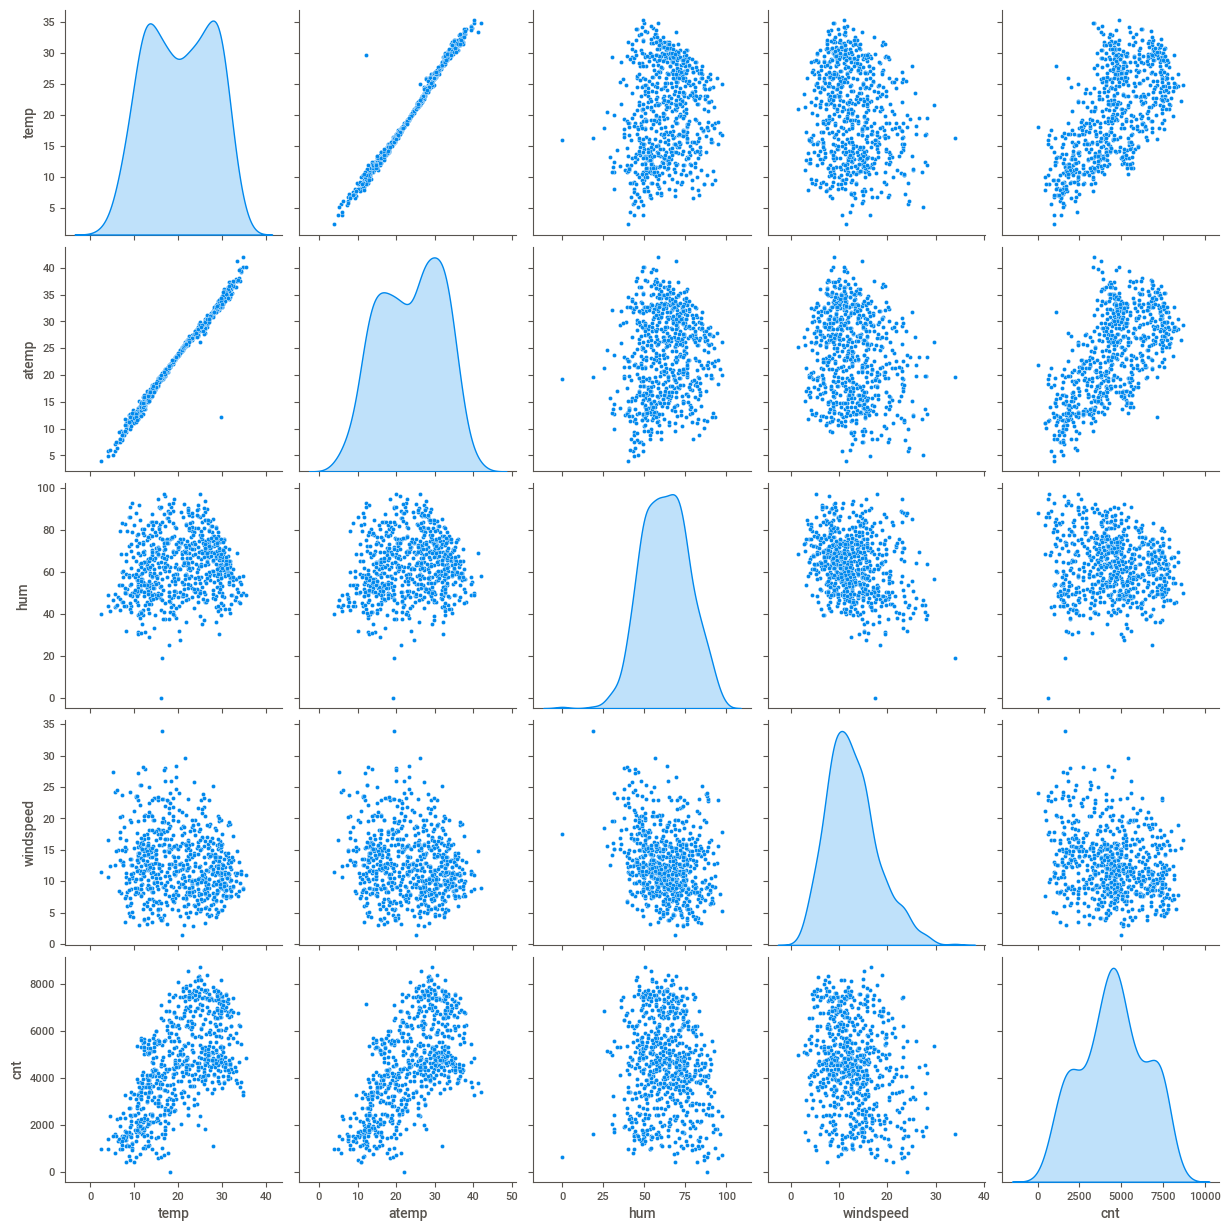

In [23]:
# Visualizing the numerical variables

day_df_numerical = day_df[["temp", "atemp", "hum", "windspeed", "cnt"]]
sns.pairplot(day_df_numerical, diag_kind='kde')
plt.show()

#### Observation:

We can see in the above pair-plot that the variables "temp" and "atemp" have a linear relationship with the variable "cnt"

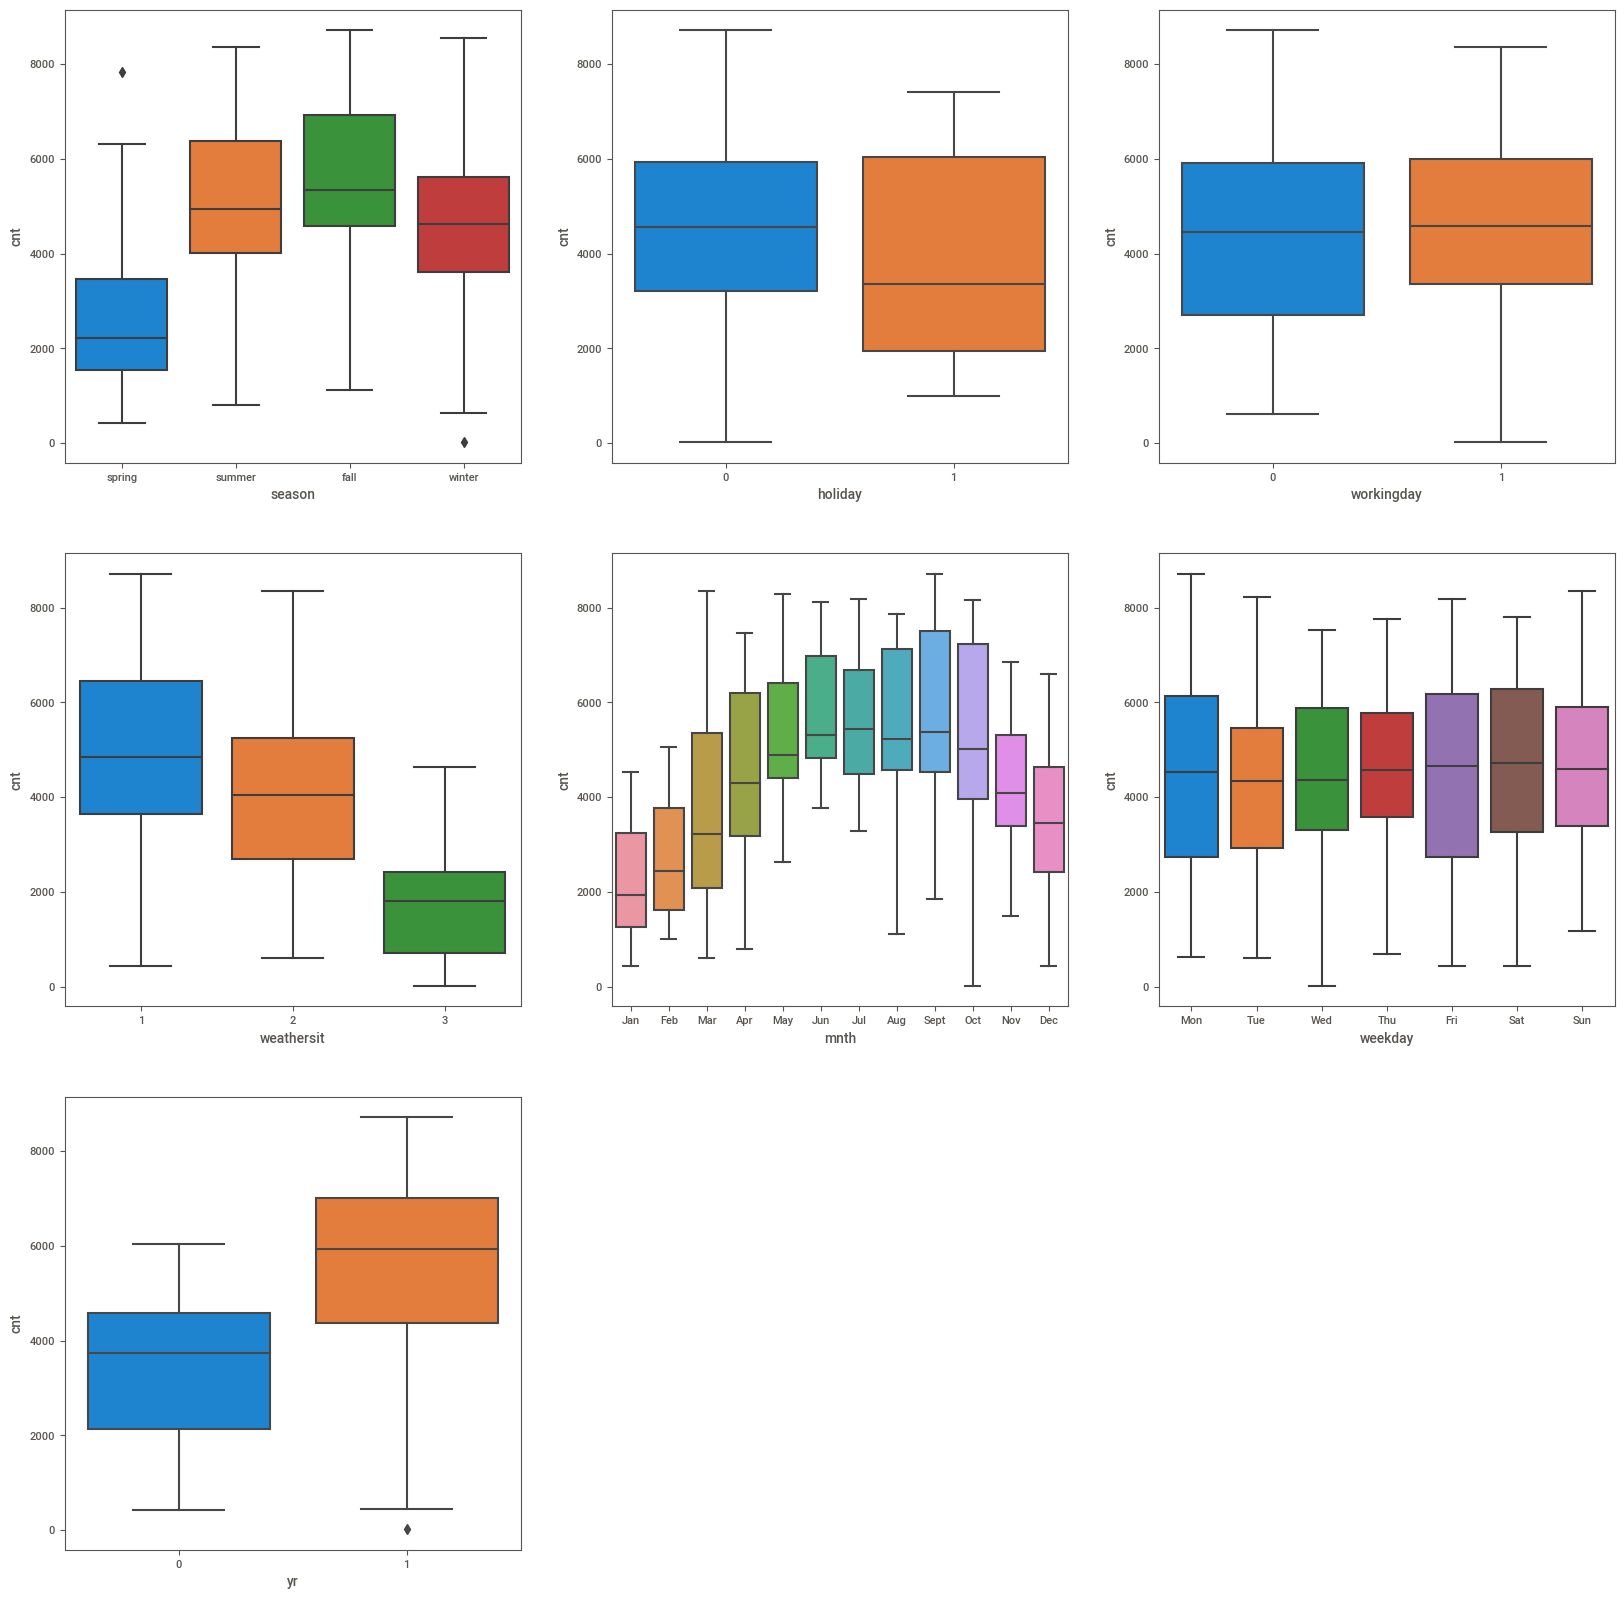

In [24]:
# Visualizing the categorical variables

plt.figure(figsize=(20, 20))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = day_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = day_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'mnth', y = 'cnt', data = day_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = day_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = day_df)
plt.show()

<AxesSubplot:>

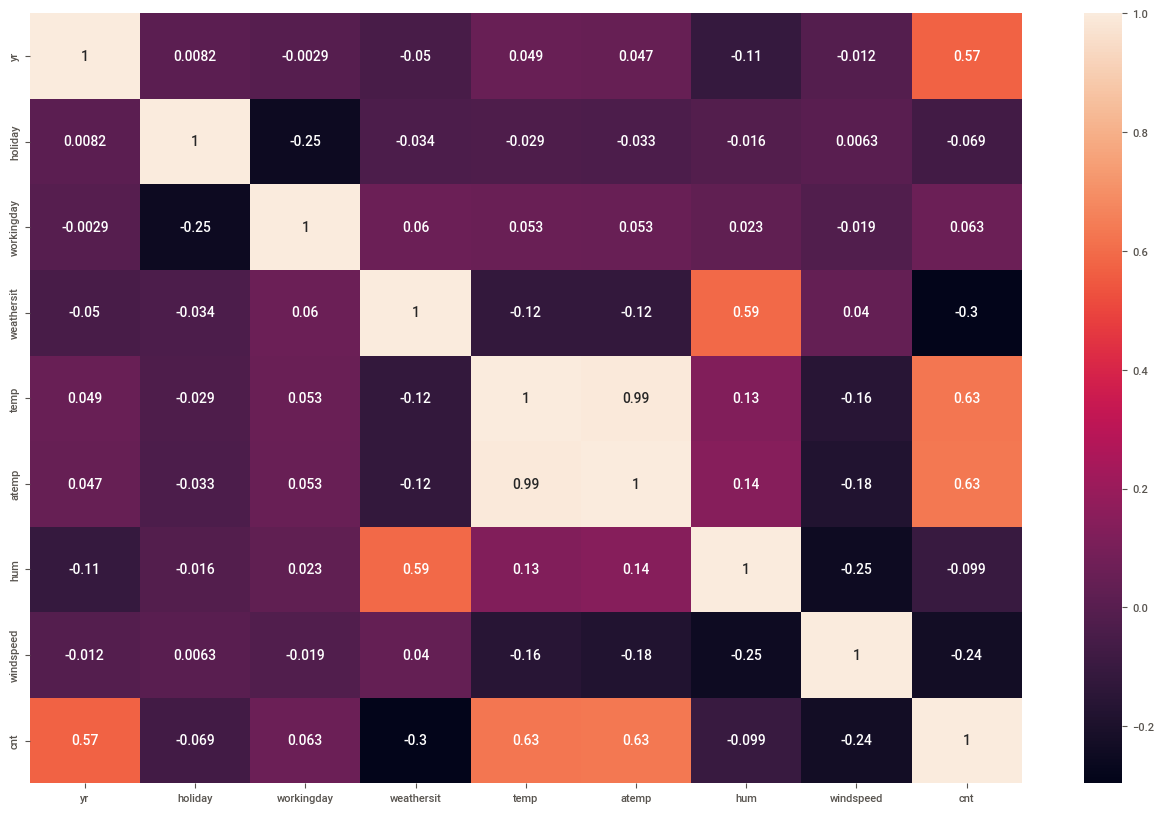

In [25]:
#Visualizing the correlation between the variables to check for multi-collinearity

plt.figure(figsize=(16,10))
sns.heatmap(day_df.corr(), annot=True)

#### Observation:

The fields "temp" and "atemp" are highly correlated with the value of 0.99. So we must be dropping/removing one of those fields

In [26]:
# Removing "atemp" due to high correlation with "temp"

day_df.drop('atemp', axis=1, inplace=True)

In [27]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 62.9+ KB


### 5. Data Preparation for Linear Regression

In [28]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,0,2,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,0,2,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,1,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,1,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,1,9.305237,43.6957,12.522300,1600


In [29]:
# Creating dummies for the fields that are having values other than 0's and 1's
day_df["weathersit"] = day_df["weathersit"].astype(np.object)
day_df_categorical = day_df[["season", "mnth", "weekday", "weathersit"]]

day_df_dummies = pd.get_dummies(day_df_categorical, drop_first=True)
day_df_dummies.head()

# Dropping the columns after creating dummies
day_df = day_df.drop(list(day_df_categorical.columns), axis=1)

# Adding the dummies variables to the dataframe
day_df = pd.concat([day_df, day_df_dummies], axis=1)

In [30]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   season_spring  730 non-null    uint8  
 8   season_summer  730 non-null    uint8  
 9   season_winter  730 non-null    uint8  
 10  mnth_Aug       730 non-null    uint8  
 11  mnth_Dec       730 non-null    uint8  
 12  mnth_Feb       730 non-null    uint8  
 13  mnth_Jan       730 non-null    uint8  
 14  mnth_Jul       730 non-null    uint8  
 15  mnth_Jun       730 non-null    uint8  
 16  mnth_Mar       730 non-null    uint8  
 17  mnth_May       730 non-null    uint8  
 18  mnth_Nov  

In [31]:
day_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Splitting the data set into training data and testing data

np.random.seed(0)
df_train, df_test = train_test_split(day_df, train_size=0.7, random_state=100)

In [33]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,1,0,0,0,0,0,1,0
111,0,0,1,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [34]:
# Scaling all the variables other than dummies and those fields that have 0's and 1's 

fields_need_scaling = ['temp', 'hum', 'windspeed','cnt']
scaler = MinMaxScaler()
df_train[fields_need_scaling] = scaler.fit_transform(df_train[fields_need_scaling])

In [35]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,1,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [36]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
# Creating X and Y from df_train

y_train = df_train.pop('cnt')
X_train = df_train

In [38]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [40]:
# Converting all fieldsinto array before fitting the model
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

### 6. Building a model with OLS starting with all variables 

In [41]:
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()

# Fitting the model
lm = LinearRegression()
lm.fit(X_train, y_train)

print(lm.coef_)
print(lm.intercept_)

[ 0.23243754 -0.05348168  0.03265267  0.44535871 -0.15147327 -0.18601045
 -0.04483403  0.04300172  0.10763159  0.02037626 -0.04427668 -0.03244123
 -0.06331466 -0.03384783  0.00460238  0.00127429  0.02467305 -0.03987901
  0.007546    0.08593786  0.03752462 -0.0036355   0.0054951  -0.01243596
 -0.01669561 -0.01543589 -0.05955091 -0.25583483]
0.3011352550392994


In [42]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sun, 05 Feb 2023   Prob (F-statistic):          3.00e-181
Time:                        12:36:58   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2409      0.036      6.786      0.000       0.171       0.311
yr                0.2324      0.008     28.819      0.000       0.217       0.248
holiday           0.0067      0.024      0.278      0.781      -0.041       0.054
workingday        0.0929      0.012      7.707      0.000       0.069       0.117
temp              0.4454      0.046      9.628      0.000       0.354       0.536
hum              -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed        -0.1860      0.026     -7.226      0.000      -0.237      -0.135
season_spring    -0.0448      0.030     -1.496      0.135      -0.104       0.014
season_summer     0.0430      0.026      1.645      0.101      -0.008       0.094
season_winter     0.1076      0.028      3.853      0.000       0.053       0.163
mnth_Aug          0.0204      0.034      0.607      0.544      -0.046       0.086
mnth_Dec         -0.0443      0.034     -1.317      0.189      -0.110       0.022
mnth_Feb         -0.0324      0.033     -0.985      0.325      -0.097       0.032
mnth_Jan         -0.0633      0.034     -1.885      0.060      -0.129       0.003
mnth_Jul         -0.0338      0.035     -0.969      0.333      -0.102       0.035
mnth_Jun          0.0046      0.025      0.186      0.853      -0.044       0.053
mnth_Mar          0.0013      0.025      0.052      0.959      -0.047       0.050
mnth_May          0.0247      0.021      1.173      0.241      -0.017       0.066
mnth_Nov         -0.0399      0.036     -1.096      0.274      -0.111       0.032
mnth_Oct          0.0075      0.036      0.210      0.834      -0.063       0.078
mnth_Sept         0.0859      0.032      2.692      0.007       0.023       0.149
weekday_Mon       0.0978      0.014      7.231      0.000       0.071       0.124
weekday_Sat      -0.0036      0.015     -0.248      0.804      -0.032       0.025
weekday_Sun       0.0055      0.015      0.368      0.713      -0.024       0.035
weekday_Thu      -0.0124      0.015     -0.844      0.399      -0.041       0.017
weekday_Tue       0.0435      0.014      3.173      0.002       0.017       0.070
weekday_Wed      -0.0154      0.015     -1.057      0.291      -0.044       0.013
weathersit_2     -0.0596      0.010     -5.709      0.000      -0.080      -0.039
weathersit_3     -0.2558      0.026     -9.699      0.000      -0.308      -0.204
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     6.95e+15
================================================================

#### Observation:

This model has adjusted R-squared as 84.4% that indicates that the model is good. But we see strong multicollinearity problems.

### 7. Building a model using RFE with 15 features

We are starting with 15 features in building the model using RFE and move on with removing features

In [44]:
rfe = RFE(lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 12),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 11),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 13),
 ('weekday_Sun', False, 10),
 ('weekday_Thu', False, 9),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 8),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [46]:
col = X_train.columns[rfe.support_]
col 

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sept', 'weekday_Mon', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [47]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [48]:
X_train_rfe = X_train[col]

In [49]:
# Checking for VIF values

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)

In [50]:
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.46
7,season_summer,2.85
13,weathersit_2,2.29
0,yr,2.09
12,weekday_Mon,1.98


In [51]:
# Add the constant before fitting the model
X_train_lm1 = sm.add_constant(X_train_rfe)

In [52]:
# Fitting the model with variables
lm1 = sm.OLS(y_train, X_train_lm1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 05 Feb 2023   Prob (F-statistic):          4.22e-191
Time:                        14:34:03   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2519      0.036      6.969

In [53]:
# Removing the field "mnth_Jan" based on high "p" value i.e., 0.047

X_train_rfe = X_train_rfe.drop(["mnth_Jan"], axis=1)

In [54]:
# Checking the VIF values again

vif1 = pd.DataFrame()
vif1["Features"] = X_train_rfe.columns
vif1["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif1["VIF"] = round(vif1["VIF"], 2)
vif1 = vif1.sort_values(by="VIF", ascending=False)

In [59]:
vif1

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
6,season_spring,4.24
8,season_winter,3.42
7,season_summer,2.85
12,weathersit_2,2.29
0,yr,2.08
11,weekday_Mon,1.97


In [55]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe)

# Fitting the model with variables
lm2 = sm.OLS(y_train, X_train_lm2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sun, 05 Feb 2023   Prob (F-statistic):          2.11e-191
Time:                        14:38:59   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2402      0.036      6.714

In [56]:
# Removing the field "holiday" based on high "p" value i.e., 0.029

X_train_rfe = X_train_rfe.drop(["holiday"], axis=1)

In [57]:
# Checking the VIF values again

vif2 = pd.DataFrame()
vif2["Features"] = X_train_rfe.columns
vif2["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif2["VIF"] = round(vif2["VIF"], 2)
vif2 = vif2.sort_values(by="VIF", ascending=False)

In [58]:
vif2

,Features,VIF
3,hum,28.38
2,temp,16.88
1,workingday,4.72
4,windspeed,4.70
5,season_spring,4.18
7,season_winter,3.39
6,season_summer,2.84
11,weathersit_2,2.28
0,yr,2.08
10,weekday_Mon,1.84


In [60]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe)

# Fitting the model with variables
lm3 = sm.OLS(y_train, X_train_lm3).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Sun, 05 Feb 2023   Prob (F-statistic):          1.54e-191
Time:                        14:42:36   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2307      0.036      6.472

In [61]:
# Removing the field "season_spring" based on high "p" value i.e., 0.006

X_train_rfe = X_train_rfe.drop(["season_spring"], axis=1)

In [62]:
# Checking the VIF values again

vif3 = pd.DataFrame()
vif3["Features"] = X_train_rfe.columns
vif3["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif3["VIF"] = round(vif3["VIF"], 2)
vif3 = vif3.sort_values(by="VIF", ascending=False)

In [64]:
vif3

,Features,VIF
3,hum,16.21
2,temp,10.36
1,workingday,4.54
4,windspeed,3.73
10,weathersit_2,2.10
0,yr,2.03
9,weekday_Mon,1.79
5,season_summer,1.76
6,season_winter,1.70
7,mnth_Jul,1.55


In [65]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe)

# Fitting the model with variables
lm4 = sm.OLS(y_train, X_train_lm4).fit()   
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.7
Date:                Sun, 05 Feb 2023   Prob (F-statistic):          4.14e-191
Time:                        14:45:16   Log-Likelihood:                 511.32
No. Observations:                 510   AIC:                            -996.6
Df Residuals:                     497   BIC:                            -941.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1712      0.028      6.014

In [66]:
# Removing the field "mnth_Jul" based on high "p" value i.e., 0.015

X_train_rfe = X_train_rfe.drop(["mnth_Jul"], axis=1)

In [67]:
# Checking the VIF values again

vif4 = pd.DataFrame()
vif4["Features"] = X_train_rfe.columns
vif4["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif4["VIF"] = round(vif4["VIF"], 2)
vif4 = vif4.sort_values(by="VIF", ascending=False)

In [68]:
vif4

,Features,VIF
3,hum,15.96
2,temp,8.12
1,workingday,4.53
4,windspeed,3.73
9,weathersit_2,2.10
0,yr,2.02
8,weekday_Mon,1.79
6,season_winter,1.66
5,season_summer,1.58
7,mnth_Sept,1.20


In [69]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe)

# Fitting the model with variables
lm5 = sm.OLS(y_train, X_train_lm5).fit()   
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     240.0
Date:                Sun, 05 Feb 2023   Prob (F-statistic):          5.10e-191
Time:                        14:47:03   Log-Likelihood:                 508.25
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     498   BIC:                            -941.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1705      0.029      5.960

In [70]:
# Removing the field "hum" based on high "VIF" value i.e., 15.96

X_train_rfe = X_train_rfe.drop(["hum"], axis=1)

In [71]:
# Checking the VIF values again

vif5 = pd.DataFrame()
vif5["Features"] = X_train_rfe.columns
vif5["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif5["VIF"] = round(vif5["VIF"], 2)
vif5 = vif5.sort_values(by="VIF", ascending=False)

In [72]:
vif5

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,weekday_Mon,1.69
4,season_summer,1.57
8,weathersit_2,1.53
5,season_winter,1.40
6,mnth_Sept,1.20
9,weathersit_3,1.08


In [73]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe)

# Fitting the model with variables
lm6 = sm.OLS(y_train, X_train_lm6).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sun, 05 Feb 2023   Prob (F-statistic):          3.13e-188
Time:                        14:48:51   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0750      0.019      4.031

#### Observations:

In this model, all the features have a VIF value less than 5 and the "p" values are all minimum.
The features and their coefficients of this model are:
    
#### constant(0.0750), yr(0.2331), workingday(0.0561), temp(0.5499), windspeed(-0.1552), season_summer(0.0886), season_winter(0.1307), mnth_Sept(0.0974), weekday_Mon(0.0675), weathersit_2(-0.0800), weathersit_3(-0.2871)

### 8. Residual Analysis:

In [75]:
# Getting predict y as per the final model
y_train_pred = lm6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

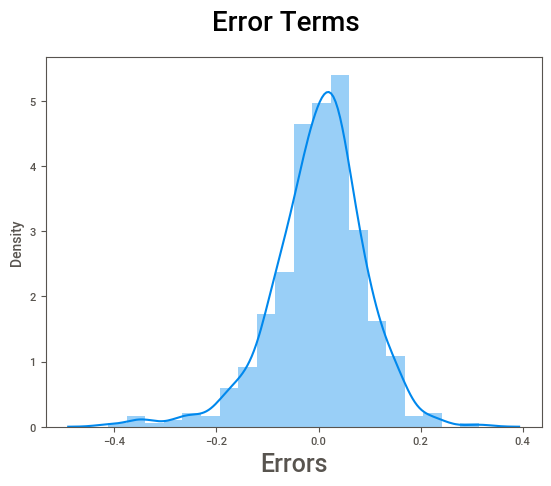

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

#### Observations : The error terms are normally distributed

### 9. Making Predictions:

In [77]:
# Scaling the test data set
df_test[fields_need_scaling] = scaler.transform(df_test[fields_need_scaling])

# Split the test data set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test

In [78]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [79]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [80]:
# Subsetting columns from test data set
X_test_rfe = X_test[X_train_rfe.columns]

In [86]:
# Adding constant to test data set
X_test_lm6 = sm.add_constant(X_test_rfe)
X_test_lm6.info()

# Predicting y value of test data set
y_pred = lm6.predict(X_test_lm6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          220 non-null    float64
 1   yr             220 non-null    int64  
 2   workingday     220 non-null    int64  
 3   temp           220 non-null    float64
 4   windspeed      220 non-null    float64
 5   season_summer  220 non-null    uint8  
 6   season_winter  220 non-null    uint8  
 7   mnth_Sept      220 non-null    uint8  
 8   weekday_Mon    220 non-null    uint8  
 9   weathersit_2   220 non-null    uint8  
 10  weathersit_3   220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


Text(0, 0.5, 'y_pred')

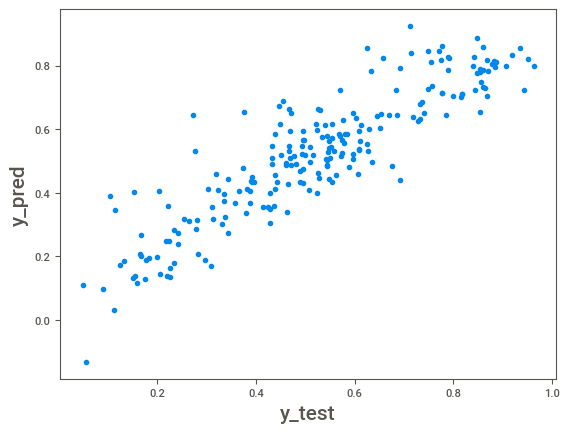

In [87]:
# Plotting test and predicted y values

fig = plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('y_test', fontsize = 15)
plt.ylabel('y_pred', fontsize = 15)  

In [91]:
# Calculating R-squared value 
r2 = r2_score(y_test, y_pred)
print(r2)

0.7961390438459766


In [92]:
# Calculating Adjusted R-squared value

n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(adjusted_r2)

0.7662536680747061


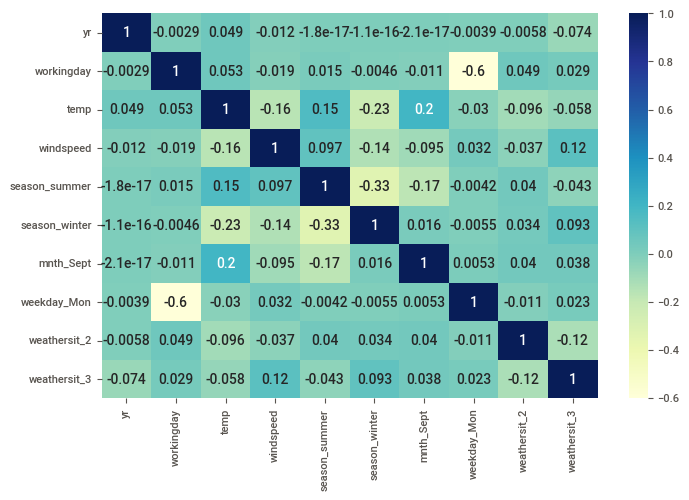

In [93]:
# Heatmap to analyse correlation
plt.figure(figsize=(8,5))
sns.heatmap(day_df[X_train_rfe.columns].corr(), cmap="YlGnBu", annot=True)
plt.show()

#### Observation:

From above analysis:
    - we can say that the model does good on the test data set.
    - we can observe that the final predictors seem to have low correlations as well.

# We can see that the equation for best fitted line is: 

# cnt = 0.0750 + yr(0.2331) + workingday(0.0561) + temp(0.5499) - windspeed(0.1552) + season_summer(0.0886) + season_winter(0.1307) + mnth_Sept(0.0974) + weekday_Mon(0.0675) - weathersit_2(0.0800) - weathersit_3(0.2871)

### Observations:

Demand for bikes increases with yr, workingday, temp, season_summer, season_winter, mnth_Sept, weekday_Mon.

Demand for bikes decreases with windspeed, weathersit_2, weathersit_3